<a href="https://colab.research.google.com/github/aicharya/PyStatsLi/blob/master/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!rm -rf ./PyStatsLi
!git clone https://github.com/aicharya/PyStatsLi.git

Cloning into 'PyStatsLi'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 55 (delta 19), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [0]:
import pandas as pd

In [0]:
#billboard = pd.read_csv( './PyStatsLi/billboard.csv' )

Encoding issue, if we try to read directly as above.

In [0]:
billboard = pd.read_csv( './PyStatsLi/billboard.csv', encoding = 'latin-1' )

In [31]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,...,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [0]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

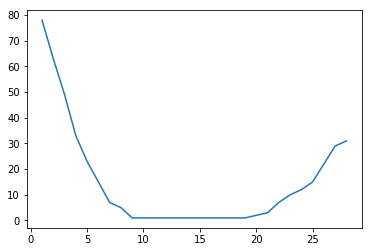

In [34]:
plt.plot(range(1,77), billboard.loc[0, 'x1st.week':'x76th.week'])

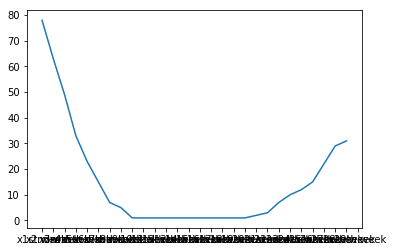

In [35]:
plt.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

In [36]:
billboard.index

RangeIndex(start=0, stop=317, step=1)

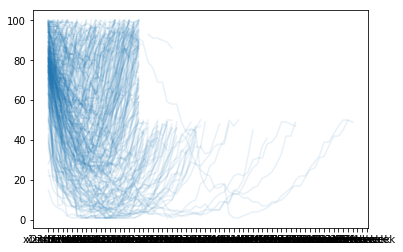

In [39]:
for index,row in billboard.iterrows():
  plt.plot(row['x1st.week':'x76th.week'], color='C0', alpha=0.1)

In [0]:
bshort = billboard[ [ 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week' ] ]

In [41]:
bshort.head()

,artist.inverted,track,time,genre,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0


Create more consistent column names

In [0]:
bshort.columns = [ 'artist', 'track', 'time', 'genre', 'date.entered', 'wk1', 'wk2', 'wk3']

In [43]:
bshort.head()

,artist,track,time,genre,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0


Melt the week columns to week and rank; (kinda transpose)

In [44]:
bmolten = bshort.melt(['artist', 'track', 'time', 'genre', 'date.entered'], ['wk1', 'wk2', 'wk3'], 'week', 'rank')
bmolten.head()

,artist,track,time,genre,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,wk1,57.0


In [45]:
bmolten.query("track == 'Liar'")

,artist,track,time,genre,date.entered,week,rank
66,Profyle,Liar,3:57,R&B,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,R&B,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,R&B,2000-09-16,wk3,25.0


In [46]:
bmolten['week'].apply(lambda s: int(s[2]))

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
921    3
922    3
923    3
924    3
925    3
926    3
927    3
928    3
929    3
930    3
931    3
932    3
933    3
934    3
935    3
936    3
937    3
938    3
939    3
940    3
941    3
942    3
943    3
944    3
945    3
946    3
947    3
948    3
949    3
950    3
Name: week, Length: 951, dtype: int64

In [47]:
bmolten['week']= bmolten['week'].apply(lambda s: int(s[2]))
bmolten.head()

,artist,track,time,genre,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,1,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,1,57.0


In [48]:
bmolten.query("track == 'Liar'")

,artist,track,time,genre,date.entered,week,rank
66,Profyle,Liar,3:57,R&B,2000-09-16,1,52.0
383,Profyle,Liar,3:57,R&B,2000-09-16,2,32.0
700,Profyle,Liar,3:57,R&B,2000-09-16,3,25.0


In [49]:
type(bmolten.loc[0,'date.entered'])

str

Translate dates to actual date_time objects

In [50]:
date_entered = pd.to_datetime(bmolten['date.entered'])
type(date_entered.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
bmolten['date.entered'] = pd.to_datetime(bmolten['date.entered'])

In [52]:
bmolten.head()

,artist,track,time,genre,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,1,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,1,57.0


In [25]:
type(bmolten.loc[0,'date.entered'])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
bmolten.query("track == 'Liar'")

,artist,track,time,genre,date.entered,week,rank
66,Profyle,Liar,3:57,R&B,2000-09-16,1,52.0
383,Profyle,Liar,3:57,R&B,2000-09-16,2,32.0
700,Profyle,Liar,3:57,R&B,2000-09-16,3,25.0


Transform week wise rank to rank on a specific date in that week.

In [54]:
rank_on_date = bmolten['date.entered'] + pd.Timedelta('7 days') * ( bmolten['week'] - 1 )
rank_on_date.head()

0   2000-09-23
1   2000-02-12
2   1999-10-23
3   2000-08-12
4   2000-08-05
dtype: datetime64[ns]

In [55]:
type(rank_on_date.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [56]:
bmolten['date'] = bmolten['date.entered'] + pd.Timedelta('7 days') * ( bmolten['week'] - 1 )
bmolten.head()

,artist,track,time,genre,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,1,71.0,1999-10-23
3,Madonna,Music,3:45,Rock,2000-08-12,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,1,57.0,2000-08-05


Now drop the date.entered column

In [57]:
bmolten.drop( ['date.entered'], axis = 1, inplace = True )
bmolten.head()

,artist,track,time,genre,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,Rock,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,Rock,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,Rock,1,71.0,1999-10-23
3,Madonna,Music,3:45,Rock,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,1,57.0,2000-08-05


In [59]:
bmolten.query("track == 'Liar'")

,artist,track,time,genre,week,rank,date
66,Profyle,Liar,3:57,R&B,1,52.0,2000-09-16
383,Profyle,Liar,3:57,R&B,2,32.0,2000-09-23
700,Profyle,Liar,3:57,R&B,3,25.0,2000-09-30


In [61]:
bfinal = bmolten[['artist', 'track', 'time', 'week', 'rank', 'date']]
bfinal.sort_values(['artist', 'track'], inplace = True)
bfinal.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,artist,track,time,week,rank,date
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,1,87.0,2000-02-26
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2,82.0,2000-03-04
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,3,72.0,2000-03-11
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,1,91.0,2000-09-02
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2,87.0,2000-09-09


Normalize

In [62]:
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [0]:
tracks.index.name = 'id'

In [0]:
tracksid = tracks.reset_index()

In [65]:
tracks.head()

,artist,track,time
id,,,
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [72]:
tracksid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [66]:
len(tracks)

317

In [70]:
len(bfinal) 

951

In [71]:
len(bfinal)  / 3

317.0

In [73]:
pd.merge( tracksid, bfinal, on = ['artist', 'track'] ).head()

,id,artist,track,time_x,time_y,week,rank,date
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,1,87.0,2000-02-26
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2,82.0,2000-03-04
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,3,72.0,2000-03-11
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,1,91.0,2000-09-02
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2,87.0,2000-09-09


Remove duplicate time, with adding it to merge

In [74]:
pd.merge( tracksid, bfinal, on = ['artist', 'track', 'time'] ).head()

,id,artist,track,time,week,rank,date
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,1,87.0,2000-02-26
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2,82.0,2000-03-04
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,3,72.0,2000-03-11
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,1,91.0,2000-09-02
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2,87.0,2000-09-09


In [75]:
tidy = pd.merge( tracksid, bfinal, on = ['artist', 'track', 'time'] ).drop( ['artist', 'track', 'time'], axis = 1 )
len(tidy)

951

In [76]:
tidy.head()

,id,week,rank,date
0,246,1,87.0,2000-02-26
1,246,2,82.0,2000-03-04
2,246,3,72.0,2000-03-11
3,287,1,91.0,2000-09-02
4,287,2,87.0,2000-09-09


Highest rank achieved by a song in weeks one, two and three.

In [77]:
tidy[tidy.week == 1]['rank'].idxmin()

756

In [78]:
tidy[tidy.week == 1]['rank'].idxmax()

258

In [79]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
week                      1
rank                     15
date    2000-02-12 00:00:00
Name: 756, dtype: object

In [81]:
tracksid.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18


In [82]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmax()]

id                      248
week                      1
rank                    100
date    2000-02-12 00:00:00
Name: 258, dtype: object

In [83]:
tracksid.query('id == 248')

,id,artist,track,time
86,248,Drama,"Left, Right, Left",3:37


In [84]:
tidy.loc[tidy[tidy.week == 2]['rank'].idxmax()]

id                      296
week                      2
rank                    100
date    2000-01-08 00:00:00
Name: 235, dtype: object

In [85]:
tracksid.query('id == 296')

,id,artist,track,time
78,296,"Diffie, Joe",The Quittin' Kind,3:23


In [86]:
tidy.loc[tidy[tidy.week == 3]['rank'].idxmax()]

id                      306
week                      3
rank                    100
date    2001-01-06 00:00:00
Name: 221, dtype: object

In [87]:
tracksid.query('id == 306')

,id,artist,track,time
73,306,De La Soul,All Good?,5:02
